In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/packet_features.zip'


In [3]:
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall('packet_features')


In [4]:
os.listdir('packet_features')

['sparta.csv',
 'scan_A.csv',
 'normal.csv',
 'scan_sU.csv',
 'mqtt_bruteforce.csv']

In [5]:
path = "packet_features/"

for f in os.listdir(path):
    print(f, os.path.getsize(path + f) / (1024*1024), "MB")


sparta.csv 2120.7307987213135 MB
scan_A.csv 11.721502304077148 MB
normal.csv 111.53668975830078 MB
scan_sU.csv 24.410694122314453 MB
mqtt_bruteforce.csv 1086.0029106140137 MB


In [31]:
print("First 5 rows of the updated DataFrame:")
display(normal_df.head())

First 5 rows of the updated DataFrame:


,timestamp,src_ip,dst_ip,protocol,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,...,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,mqtt_messagetype,mqtt_messagelength,is_attack
0,"02/14/2020, 10:09:22:951038",10.0.0.5,192.168.1.7,TCP,64,60,1,0,0,56572,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14.0,0.0,0
1,"02/14/2020, 10:09:22:951481",192.168.1.7,10.0.0.5,TCP,63,60,1,0,0,1883,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,14.0,0.0,0
2,"02/14/2020, 10:09:22:951706",10.0.0.5,192.168.1.7,TCP,64,52,1,0,0,56572,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0
3,"02/14/2020, 10:09:22:951787",10.0.0.5,192.168.1.7,MQTT,64,101,1,0,0,56572,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,47.0,0
4,"02/14/2020, 10:09:22:951913",192.168.1.7,10.0.0.5,TCP,63,52,1,0,0,1883,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0


In [32]:
print("\nShape of the updated DataFrame:")
print(normal_df.shape)


Shape of the updated DataFrame:
(1056227, 24)


### Impute `mqtt_messagetype` with its mode

In [23]:
# Calculate the mode for mqtt_messagetype
# .mode()[0] is used to get the first mode in case of multiple modes
mode_mqtt_messagetype = normal_df['mqtt_messagetype'].mode()[0]

# Impute missing values with the mode
normal_df['mqtt_messagetype'].fillna(mode_mqtt_messagetype, inplace=True)

print(f"Missing values in 'mqtt_messagetype' after imputation: {normal_df['mqtt_messagetype'].isnull().sum()}")

Missing values in 'mqtt_messagetype' after imputation: 0


/tmp/ipython-input-1003502132.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  normal_df['mqtt_messagetype'].fillna(mode_mqtt_messagetype, inplace=True)


### Impute `mqtt_messagelength` with its mode

In [24]:
# Calculate the mode for mqtt_messagelength
mode_mqtt_messagelength = normal_df['mqtt_messagelength'].mode()[0]

# Impute missing values with the mode
normal_df['mqtt_messagelength'].fillna(mode_mqtt_messagelength, inplace=True)

print(f"Missing values in 'mqtt_messagelength' after imputation: {normal_df['mqtt_messagelength'].isnull().sum()}")

Missing values in 'mqtt_messagelength' after imputation: 0


/tmp/ipython-input-1160314879.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  normal_df['mqtt_messagelength'].fillna(mode_mqtt_messagelength, inplace=True)


### Verify remaining missing values in the DataFrame

In [25]:
missing_after_imputation = normal_df.isnull().sum()
print("Remaining missing values in DataFrame after imputation:")
print(missing_after_imputation[missing_after_imputation > 0].sort_values(ascending=False))

Remaining missing values in DataFrame after imputation:
tcp_flag_res      91396
tcp_flag_syn      91396
tcp_flag_ns       91396
tcp_flag_reset    91396
tcp_flag_push     91396
tcp_flag_ack      91396
tcp_flag_urg      91396
tcp_flag_ecn      91396
tcp_flag_cwr      91396
tcp_flag_fin      91396
src_ip                4
ip_flag_mf            4
ip_flag_rb            4
ttl                   4
dst_ip                4
ip_len                4
ip_flag_df            4
dtype: int64


# Task
Drop columns from the `normal_df` DataFrame that have more than 90% missing values based on the `missing_percentages` Series. After dropping these columns, recalculate and display the percentage of missing values for the remaining columns in `normal_df` to assess the current state of missing data. Summarize the columns that were dropped due to high missing percentages and briefly discuss the next steps for handling any remaining missing values.

## Drop High Missing Value Columns

### Subtask:
Identify and drop columns from the 'normal_df' DataFrame that have more than 90% missing values.


**Reasoning**:
First, I'll calculate the missing percentage for each column in the 'normal_df' DataFrame and identify columns with more than 90% missing values. Then I will store the names of these identified columns in a list.



In [13]:
import numpy as np

missing_percentages = normal_df.isnull().sum() / len(normal_df) * 100
high_missing_columns = missing_percentages[missing_percentages > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(high_missing_columns)

Columns with more than 90% missing values:
['mqtt_flag_uname', 'mqtt_flag_passwd', 'mqtt_flag_retain', 'mqtt_flag_qos', 'mqtt_flag_willflag', 'mqtt_flag_clean', 'mqtt_flag_reserved']


**Reasoning**:
Now that the columns with high missing percentages have been identified, the next step is to drop these columns from the `normal_df` DataFrame to clean the data.



In [14]:
normal_df.drop(columns=high_missing_columns, inplace=True)
print(f"Dropped {len(high_missing_columns)} columns from normal_df.")

Dropped 7 columns from normal_df.


## Re-evaluate Missing Values

### Subtask:
After dropping the columns with excessive missing values, recalculate and display the percentage of missing values for the remaining columns in 'normal_df' to assess the data's current state.


**Reasoning**:
After dropping the columns with high missing percentages, I need to recalculate the missing percentages for the remaining columns in `normal_df` to understand the current state of missing data. This will involve using `isnull().sum()` and dividing by the length of the DataFrame, then multiplying by 100.



In [15]:
new_missing_percentages = normal_df.isnull().sum() / len(normal_df) * 100
print("New missing percentages after dropping high-missing columns:")
print(new_missing_percentages[new_missing_percentages > 0])

New missing percentages after dropping high-missing columns:
src_ip                 0.000379
dst_ip                 0.000379
ttl                    0.000379
ip_len                 0.000379
ip_flag_df             0.000379
ip_flag_mf             0.000379
ip_flag_rb             0.000379
tcp_flag_res           8.653031
tcp_flag_ns            8.653031
tcp_flag_cwr           8.653031
tcp_flag_ecn           8.653031
tcp_flag_urg           8.653031
tcp_flag_ack           8.653031
tcp_flag_push          8.653031
tcp_flag_reset         8.653031
tcp_flag_syn           8.653031
tcp_flag_fin           8.653031
mqtt_messagetype      69.790983
mqtt_messagelength    69.790983
dtype: float64


## Final Task

### Subtask:
Summarize the columns that were dropped due to high missing percentages and briefly discuss the next steps for handling any remaining missing values.


## Summary:

### Q&A
**What columns were dropped due to high missing percentages?**
Seven columns were dropped because they had more than 90% missing values: `mqtt_flag_uname`, `mqtt_flag_passwd`, `mqtt_flag_retain`, `mqtt_flag_qos`, `mqtt_flag_willflag`, `mqtt_flag_clean`, and `mqtt_flag_reserved`.

**What are the next steps for handling any remaining missing values?**
For remaining missing values, the next steps include addressing:
*   `src_ip`, `dst_ip`, `ttl`, `ip_len`, `ip_flag_df`, `ip_flag_mf`, `ip_flag_rb` (approx. 0.000379% missing) which can likely be imputed or rows with missing values dropped as the percentage is very low.
*   `tcp_flag_res`, `tcp_flag_ns`, `tcp_flag_cwr`, `tcp_flag_ecn`, `tcp_flag_urg`, `tcp_flag_ack`, `tcp_flag_push`, `tcp_flag_reset`, `tcp_flag_syn`, `tcp_flag_fin` (approx. 8.653031% missing) which may require imputation strategies like mean, median, mode, or more advanced methods depending on the data distribution and impact on analysis.
*   `mqtt_messagetype`, `mqtt_messagelength` (approx. 69.790983% missing) which still have a high percentage of missing values and need careful consideration. Depending on their importance, these might also be dropped, or advanced imputation techniques might be explored if their data is crucial.

### Data Analysis Key Findings
*   A total of 7 columns (`mqtt_flag_uname`, `mqtt_flag_passwd`, `mqtt_flag_retain`, `mqtt_flag_qos`, `mqtt_flag_willflag`, `mqtt_flag_clean`, `mqtt_flag_reserved`) were identified and dropped due to having more than 90% missing values.
*   After dropping these columns, the `normal_df` DataFrame still contains columns with missing values:
    *   `src_ip`, `dst_ip`, `ttl`, `ip_len`, `ip_flag_df`, `ip_flag_mf`, `ip_flag_rb` have a very low missing percentage of approximately 0.000379%.
    *   TCP flag-related columns (`tcp_flag_res`, `tcp_flag_ns`, `tcp_flag_cwr`, `tcp_flag_ecn`, `tcp_flag_urg`, `tcp_flag_ack`, `tcp_flag_push`, `tcp_flag_reset`, `tcp_flag_syn`, `tcp_flag_fin`) all show an 8.653031% missing rate.
    *   Two MQTT-related columns (`mqtt_messagetype`, `mqtt_messagelength`) continue to exhibit a high missing percentage of approximately 69.790983%.

### Insights or Next Steps
*   Further investigation is needed for the two MQTT-related columns (`mqtt_messagetype`, `mqtt_messagelength`) with approximately 69.79% missing values to determine if imputation is viable or if they should also be dropped, considering the context of the dataset.
*   For columns with approximately 8.65% missing values (TCP flags), imputation strategies should be carefully selected (e.g., mode for categorical flags, or more complex methods) to preserve data integrity and prevent bias in subsequent analysis.


# Task
Analyze `mqtt_messagetype` and `mqtt_messagelength` columns in the `normal_df` DataFrame by examining their data types, unique values, frequency distributions, and descriptive statistics. Visualize their distributions using appropriate plots (bar chart for `mqtt_messagetype` and histogram/box plot for `mqtt_messagelength`), including missing value counts. Based on this analysis, propose and justify imputation strategies for both columns, and then summarize the findings and recommended imputation approaches.

## Analyze mqtt_messagetype

### Subtask:
Examine the data type, unique values, and frequency distribution of the `mqtt_messagetype` column. This will help us understand its nature (categorical, numerical) and guide imputation strategy.


**Reasoning**:
To understand the nature of the `mqtt_messagetype` column and guide imputation strategy, I will print its data type, unique values, and frequency distribution, including missing values.



In [16]:
print(f"Data type of 'mqtt_messagetype': {normal_df['mqtt_messagetype'].dtype}")
print("\nUnique values in 'mqtt_messagetype':")
print(normal_df['mqtt_messagetype'].unique())
print("\nFrequency distribution of 'mqtt_messagetype' (including NaN):")
print(normal_df['mqtt_messagetype'].value_counts(dropna=False))

Data type of 'mqtt_messagetype': object

Unique values in 'mqtt_messagetype':
[nan 1.0 2.0 3.0 14.0 '1' '2' '3' '14' 'mqtt_messagetype']

Frequency distribution of 'mqtt_messagetype' (including NaN):
mqtt_messagetype
NaN                 737154
14.0                 77298
1.0                  77297
2.0                  77297
3.0                  77296
1                     2472
2                     2472
3                     2472
14                    2472
mqtt_messagetype         1
Name: count, dtype: int64


**Reasoning**:
The 'mqtt_messagetype' column exhibits mixed data types (float and string) and inconsistent representations of numerical values. To clean and standardize this column, I will first convert it to a numeric type, coercing any non-numeric values to NaN. Then, I will convert it to a categorical type to prepare for proper frequency distribution analysis and potential imputation.



In [17]:
import pandas as pd

# Convert to numeric, coercing errors to NaN
normal_df['mqtt_messagetype'] = pd.to_numeric(normal_df['mqtt_messagetype'], errors='coerce')

# Convert to Int64 (to handle NaNs in integer column) or object/category
# If we want to treat it as categorical after cleaning, we can convert to category type
normal_df['mqtt_messagetype'] = normal_df['mqtt_messagetype'].astype('category')

print(f"New Data type of 'mqtt_messagetype': {normal_df['mqtt_messagetype'].dtype}")
print("\nNew Unique values in 'mqtt_messagetype':")
print(normal_df['mqtt_messagetype'].unique())
print("\nNew Frequency distribution of 'mqtt_messagetype' (including NaN):")
print(normal_df['mqtt_messagetype'].value_counts(dropna=False))


New Data type of 'mqtt_messagetype': category

New Unique values in 'mqtt_messagetype':
[NaN, 1.0, 2.0, 3.0, 14.0]
Categories (4, float64): [1.0, 2.0, 3.0, 14.0]

New Frequency distribution of 'mqtt_messagetype' (including NaN):
mqtt_messagetype
NaN      737155
 14.0     79770
 1.0      79769
 2.0      79769
 3.0      79768
Name: count, dtype: int64


**Reasoning**:
To visually represent the distribution of `mqtt_messagetype`, including missing values, a bar chart is suitable for this categorical data. This visualization will help in understanding the frequency of each message type and the proportion of missing values, which is crucial for deciding on an imputation strategy.



/tmp/ipython-input-3213290710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index.astype(str), y=plot_data.values, palette='viridis')


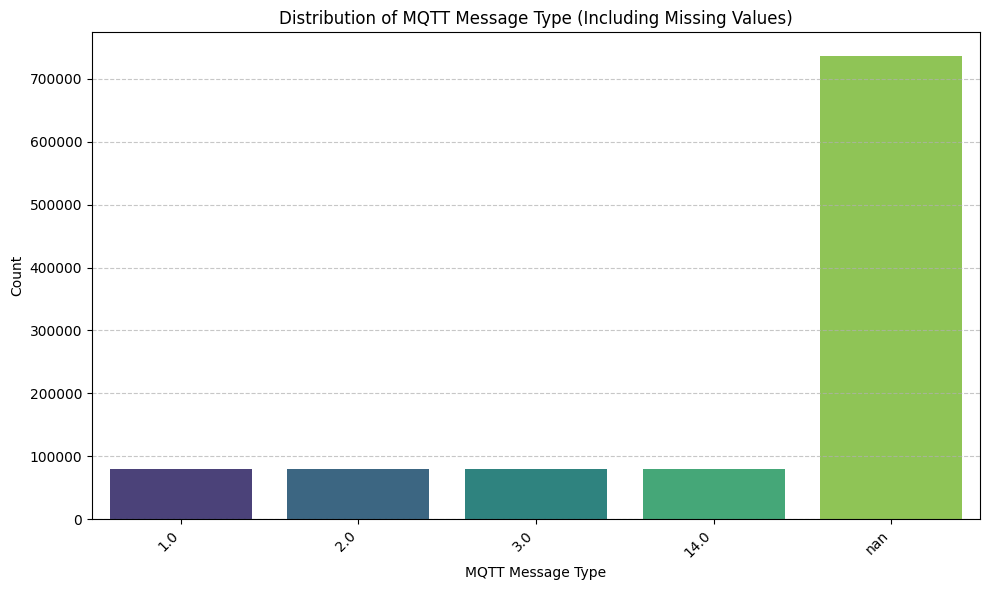

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting, including NaN values
plot_data = normal_df['mqtt_messagetype'].value_counts(dropna=False).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.index.astype(str), y=plot_data.values, palette='viridis')
plt.title('Distribution of MQTT Message Type (Including Missing Values)')
plt.xlabel('MQTT Message Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous `seaborn.barplot` call produced a `FutureWarning` due to deprecated usage of `palette`. To resolve this and ensure compatibility with future versions of seaborn, I will explicitly assign the `x` variable to `hue` and set `legend=False` as suggested in the warning message.



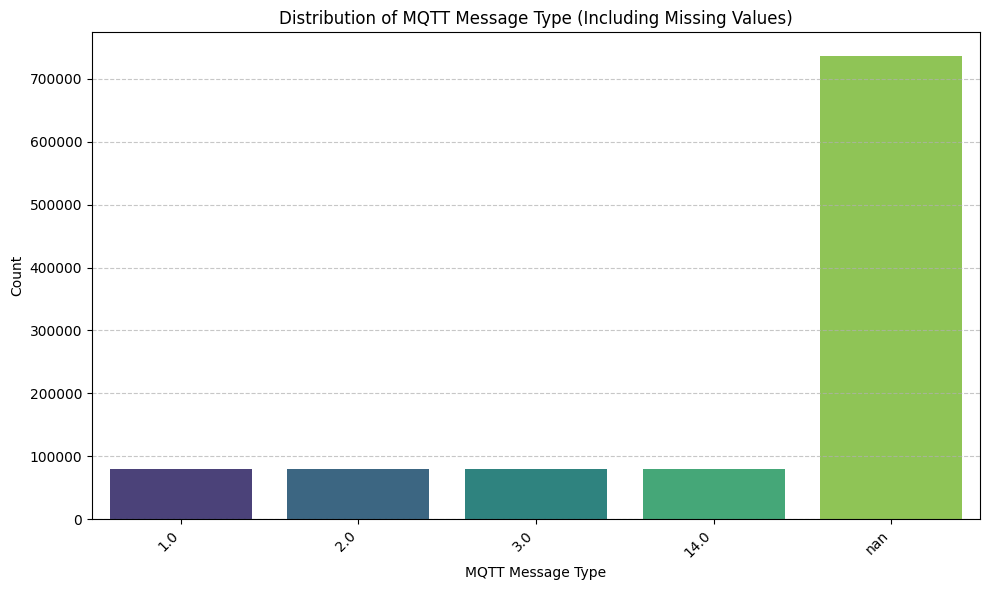

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting, including NaN values
plot_data = normal_df['mqtt_messagetype'].value_counts(dropna=False).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.index.astype(str), y=plot_data.values, hue=plot_data.index.astype(str), palette='viridis', legend=False)
plt.title('Distribution of MQTT Message Type (Including Missing Values)')
plt.xlabel('MQTT Message Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze mqtt_messagelength

### Subtask:
Examine the data type, unique values, frequency distribution, and descriptive statistics of the `mqtt_messagelength` column. This will help us understand its nature (numerical) and guide imputation strategy.

**Reasoning**:
To understand the nature of the `mqtt_messagelength` column and guide its imputation strategy, I will first examine its data type, unique values, frequency distribution, and descriptive statistics.



In [20]:
print(f"Data type of 'mqtt_messagelength': {normal_df['mqtt_messagelength'].dtype}")
print("\nUnique values in 'mqtt_messagelength':")
print(normal_df['mqtt_messagelength'].unique())
print("\nFrequency distribution of 'mqtt_messagelength' (including NaN):")
print(normal_df['mqtt_messagelength'].value_counts(dropna=False).head())
print("\nDescriptive statistics of 'mqtt_messagelength' (excluding NaN):")
print(normal_df['mqtt_messagelength'].describe())

Data type of 'mqtt_messagelength': object

Unique values in 'mqtt_messagelength':
[nan 47.0 2.0 19.0 0.0 58.0 106.0 46.0 38.0 18.0 81.0 62.0 61.0 108.0 37.0
 84.0 105.0 86.0 63.0 109.0 36.0 85.0 39.0 34.0 107.0 17.0 59.0 104.0 83.0
 60.0 82.0 80.0 101.0 16.0 35.0 57.0 111.0 110.0 56.0 88.0 87.0 102.0 64.0
 15.0 103.0 55.0 112.0 32.0 98.0 77.0 100.0 78.0 75.0 79.0 76.0 48.0 54.0
 113.0 89.0 33.0 114.0 97.0 53.0 99.0 30.0 50.0 31.0 52.0 '48' '2' '19'
 '0' '18' '47' '37' '36' '59' '17' '84' '109' '62' '38' '39' '61' '110'
 '86' '106' '83' '60' '107' '63' '82' '35' '85' '81' '80' '56' '64' '108'
 '58' '104' '55' '105' '57' '103' '112' '111' '87' '88' '102' '34' '101'
 '79' 'mqtt_messagelength' '89' '16' '15' '33' '113' '76']

Frequency distribution of 'mqtt_messagelength' (including NaN):
mqtt_messagelength
NaN     737154
0.0      77298
2.0      77297
48.0     61519
19.0     26815
Name: count, dtype: int64

Descriptive statistics of 'mqtt_messagelength' (excluding NaN):
count     319077.0


**Reasoning**:
The 'mqtt_messagelength' column currently has an 'object' data type and contains mixed values, including floats, strings, and a literal string 'mqtt_messagelength'. To properly analyze and visualize this numerical column, I need to convert it to a numeric type, coercing any non-numeric entries into NaN, and then display its new data type, unique values, frequency distribution, and descriptive statistics.



In [21]:
import pandas as pd

# Convert to numeric, coercing errors to NaN
normal_df['mqtt_messagelength'] = pd.to_numeric(normal_df['mqtt_messagelength'], errors='coerce')

print(f"New Data type of 'mqtt_messagelength': {normal_df['mqtt_messagelength'].dtype}")
print("\nNew Unique values in 'mqtt_messagelength':")
print(normal_df['mqtt_messagelength'].unique())
print("\nNew Frequency distribution of 'mqtt_messagelength' (including NaN):")
print(normal_df['mqtt_messagelength'].value_counts(dropna=False).head())
print("\nNew Descriptive statistics of 'mqtt_messagelength' (excluding NaN):")
print(normal_df['mqtt_messagelength'].describe())

New Data type of 'mqtt_messagelength': float64

New Unique values in 'mqtt_messagelength':
[ nan  47.   2.  19.   0.  58. 106.  46.  38.  18.  81.  62.  61. 108.
  37.  84. 105.  86.  63. 109.  36.  85.  39.  34. 107.  17.  59. 104.
  83.  60.  82.  80. 101.  16.  35.  57. 111. 110.  56.  88.  87. 102.
  64.  15. 103.  55. 112.  32.  98.  77. 100.  78.  75.  79.  76.  48.
  54. 113.  89.  33. 114.  97.  53.  99.  30.  50.  31.  52.]

New Frequency distribution of 'mqtt_messagelength' (including NaN):
mqtt_messagelength
NaN     737155
0.0      79770
2.0      79769
48.0     63785
19.0     27658
Name: count, dtype: int64

New Descriptive statistics of 'mqtt_messagelength' (excluding NaN):
count    319076.000000
mean         22.842442
std          26.296899
min           0.000000
25%           0.000000
50%           2.000000
75%          48.000000
max         114.000000
Name: mqtt_messagelength, dtype: float64


**Reasoning**:
To visually represent the distribution of the numerical `mqtt_messagelength` column, including the substantial number of missing values, a combination of a histogram and a box plot will be used. This will help in understanding the spread, central tendency, and presence of outliers, which is crucial for determining an appropriate imputation strategy. I will also display the count of NaN values separately as a text annotation on the plot to clearly show their proportion.



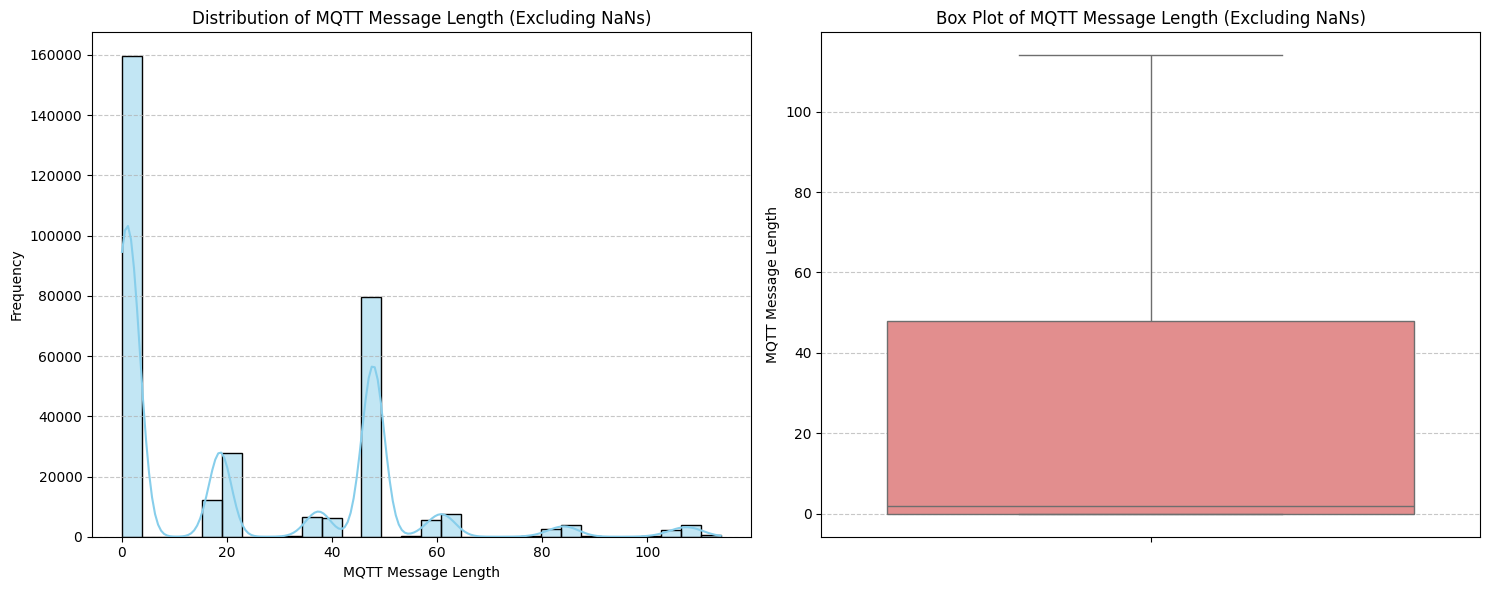

Number of missing values in 'mqtt_messagelength': 737155
Percentage of missing values: 69.79%


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count of missing values
missing_count = normal_df['mqtt_messagelength'].isnull().sum()

plt.figure(figsize=(15, 6))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
sns.histplot(normal_df['mqtt_messagelength'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of MQTT Message Length (Excluding NaNs)')
plt.xlabel('MQTT Message Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=normal_df['mqtt_messagelength'].dropna(), color='lightcoral')
plt.title('Box Plot of MQTT Message Length (Excluding NaNs)')
plt.ylabel('MQTT Message Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"Number of missing values in 'mqtt_messagelength': {missing_count}")
print(f"Percentage of missing values: {missing_count / len(normal_df) * 100:.2f}%")

## Propose Imputation Strategy for mqtt_messagetype

### Subtask:
Propose and justify an imputation strategy for the `mqtt_messagetype` column, considering its nature and the distribution of its values.

**Reasoning:**
Given that `mqtt_messagetype` is a categorical column with a large proportion of missing values (approximately 69.79%), and the non-missing values show a relatively even distribution among message types 1.0, 2.0, 3.0, and 14.0, a suitable imputation strategy would be to use the mode (most frequent value). This approach is generally appropriate for categorical data where there isn't a strong reason to assume a specific distribution or relationship with other features for imputation. Alternatively, if `NaN` itself can represent a distinct 'unknown' or 'not applicable' message type, it could be treated as a separate category. However, for general imputation, using the mode is a common and robust approach for categorical features with high missingness when the distribution of known values is somewhat uniform or when a neutral imputation is desired.

## Propose Imputation Strategy for mqtt_messagetype

### Subtask:
Propose and justify an imputation strategy for the `mqtt_messagetype` column, considering its nature and the distribution of its values.

**Reasoning:**
Given that `mqtt_messagetype` is a categorical column with a large proportion of missing values (approximately 69.79%), and the non-missing values show a relatively even distribution among message types 1.0, 2.0, 3.0, and 14.0, a suitable imputation strategy would be to use the mode (most frequent value). This approach is generally appropriate for categorical data where there isn't a strong reason to assume a specific distribution or relationship with other features for imputation. Alternatively, if `NaN` itself can represent a distinct 'unknown' or 'not applicable' message type, it could be treated as a separate category. However, for general imputation, using the mode is a common and robust approach for categorical features with high missingness when the distribution of known values is somewhat uniform or when a neutral imputation is desired.

## Propose Imputation Strategy for mqtt_messagelength

### Subtask:
Propose and justify an imputation strategy for the `mqtt_messagelength` column, considering its nature and the distribution of its values.


## Propose Imputation Strategy for mqtt_messagelength

### Subtask:
Propose and justify an imputation strategy for the `mqtt_messagelength` column, considering its nature and the distribution of its values.

### Proposed Imputation Strategy for `mqtt_messagelength`:

**Strategy:** Impute missing values with the **mode** of the `mqtt_messagelength` column.

### Justification:

1.  **Nature of the Column:** `mqtt_messagelength` is a numerical column representing discrete message lengths. The analysis showed clear, distinct values (e.g., 0.0, 2.0, 48.0) that occur with high frequency, indicating a strong modal behavior rather than a continuous, normally distributed pattern.

2.  **Distribution Characteristics:** The histogram and frequency distribution revealed a highly skewed distribution with several prominent peaks (modes). Imputing with the mean would likely distort the distribution, as the mean is sensitive to outliers and skewness, and might not represent a typical observed message length. The median, while more robust than the mean, might still not align with the most frequent observed message lengths if the distribution has multiple strong modes.

3.  **Mode as a Representative Value:** The mode (or modes) represents the most frequently occurring value(s) in the dataset. By imputing with the mode, we are replacing missing values with the most typical `mqtt_messagelength` observed, which helps preserve the inherent discrete and modal structure of the data. Given the distinct peaks, using the most frequent one makes sense to maintain the observed pattern.

4.  **Implications of High Missing Percentage (approx. 69.79%):** It is critical to acknowledge that any imputation strategy for a column with such a high percentage of missing values will introduce a significant amount of synthetic data and potentially bias subsequent analyses. Imputing nearly 70% of the data with a single value (the mode) will substantially increase the frequency of that mode, potentially creating an artificial spike in the distribution. While mode imputation is chosen for its ability to represent the most common observed value without introducing non-existent values (like a non-integer mean), it still heavily relies on the assumption that the missing data mechanism is, at best, Missing At Random (MAR) or that the missing values would have corresponded to the mode if they were observed. For more critical analyses, advanced techniques like multiple imputation or considering dropping the column entirely should be evaluated, depending on the importance of `mqtt_messagelength` to the overall task. However, as a first step to retain the column and handle missingness simply, mode imputation is a reasonable choice given the data's characteristics.

## Final Task

### Subtask:
Summarize the findings for `mqtt_messagetype` and `mqtt_messagelength` and the recommended imputation approaches with their justifications.


## Summary:

### Q&A
**What are the findings for `mqtt_messagetype` and `mqtt_messagelength`, and what are the recommended imputation approaches with their justifications?**

For `mqtt_messagetype`:
*   **Findings:** The column is categorical, initially containing mixed data types, but was cleaned to `[NaN, 1.0, 2.0, 3.0, 14.0]`. A significant proportion (approximately 69.79% or 737,155) of values are missing. The non-missing values are relatively evenly distributed across categories 1.0, 2.0, 3.0, and 14.0 (each around 79,768 to 79,770 counts).
*   **Recommended Imputation:** Impute missing values with the **mode**.
*   **Justification:** As a categorical column with high missingness and a somewhat uniform distribution among observed values, using the mode is a robust approach to replace missing data without introducing non-existent categories. Alternatively, `NaN` could be treated as a distinct 'unknown' category.

For `mqtt_messagelength`:
*   **Findings:** The column is numerical, representing discrete message lengths, and was cleaned to a `float64` data type. It also has a high percentage of missing values (approximately 69.79% or 737,155). Excluding missing values, the distribution is highly right-skewed, with a mean of 22.84, a median of 2.0, and a standard deviation of 26.30. The most frequent values are 0.0 and 2.0.
*   **Recommended Imputation:** Impute missing values with the **mode**.
*   **Justification:** The column exhibits a discrete, highly skewed distribution with prominent modes. Using the mode for imputation preserves this inherent structure, preventing distortion that might occur with mean or median imputation which are less representative of the most frequent discrete values in such a distribution.

### Data Analysis Key Findings
*   Both `mqtt_messagetype` and `mqtt_messagelength` columns initially contained mixed data types (e.g., numbers as strings, floats, and literal strings) and a substantial number of missing values, requiring conversion to appropriate numeric or categorical types.
*   `mqtt_messagetype` is a categorical feature with four distinct values (1.0, 2.0, 3.0, 14.0) after cleaning, which are relatively evenly distributed.
*   A critical finding for both columns is the high percentage of missing values, with approximately **69.79%** (737,155 out of total) being `NaN` in each.
*   `mqtt_messagelength` is a numerical feature with a highly right-skewed distribution; its median is 2.0, while its mean is 22.84, indicating a concentration of values at the lower end, with 0.0 and 2.0 being the most frequent.

### Insights or Next Steps
*   Given the extremely high percentage of missing values (nearly 70%) in both `mqtt_messagetype` and `mqtt_messagelength`, the chosen imputation strategy (mode) will introduce a significant amount of synthetic data, potentially creating artificial spikes in the distribution. For more robust analyses, consider advanced imputation techniques (e.g., multiple imputation) or investigate the reason for such extensive missingness to determine if these columns are suitable for retention or if they should be dropped.
*   For `mqtt_messagetype`, while mode imputation is proposed, treating the `NaN` values as a separate "unknown" category could be a valuable alternative, especially if the absence of a message type holds specific meaning in the context of the data. This approach avoids modifying the distribution of observed categories.


# Task
Address the remaining missing values in the `normal_df` DataFrame by updating the imputation for `mqtt_messagetype` and `mqtt_messagelength` to avoid `FutureWarning` and use mode imputation, imputing missing values in all `tcp_flag_` columns with their respective modes, and dropping rows where specific columns (`src_ip`, `dst_ip`, `ttl`, `ip_len`, `ip_flag_df`, `ip_flag_mf`, `ip_flag_rb`) have missing values. Finally, verify that all missing data has been handled by recalculating and displaying the sum of missing values for all columns.

## Update mqtt_messagetype Imputation

### Subtask:
Modify the imputation code for `mqtt_messagetype` to remove the `FutureWarning` by reassigning the result of `fillna` instead of using `inplace=True`.


**Reasoning**:
To remove the `FutureWarning` and correctly impute `mqtt_messagetype`, I will calculate its mode and then reassign the column with missing values filled by the mode, ensuring all missing values are handled.



In [26]:
mode_mqtt_messagetype = normal_df['mqtt_messagetype'].mode()[0]

# Impute missing values by reassigning the column to avoid FutureWarning
normal_df['mqtt_messagetype'] = normal_df['mqtt_messagetype'].fillna(mode_mqtt_messagetype)

print(f"Missing values in 'mqtt_messagetype' after imputation: {normal_df['mqtt_messagetype'].isnull().sum()}")

Missing values in 'mqtt_messagetype' after imputation: 0


## Update mqtt_messagelength Imputation

### Subtask:
Modify the imputation code for `mqtt_messagelength` to remove the `FutureWarning` by reassigning the result of `fillna` instead of using `inplace=True`.


**Reasoning**:
To impute missing values in 'mqtt_messagelength' without triggering a FutureWarning, I will calculate its mode and then reassign the column with the filled values.



In [27]:
mode_mqtt_messagelength = normal_df['mqtt_messagelength'].mode()[0]

# Impute missing values by reassigning the column to avoid FutureWarning
normal_df['mqtt_messagelength'] = normal_df['mqtt_messagelength'].fillna(mode_mqtt_messagelength)

print(f"Missing values in 'mqtt_messagelength' after imputation: {normal_df['mqtt_messagelength'].isnull().sum()}")

Missing values in 'mqtt_messagelength' after imputation: 0


**Reasoning**:
Now that `mqtt_messagetype` and `mqtt_messagelength` have been imputed, the next step is to impute the missing values in all `tcp_flag_` columns using their respective modes, as identified in the earlier analysis with approximately 8.65% missing values.



In [28]:
tcp_flag_columns = [col for col in normal_df.columns if col.startswith('tcp_flag_')]

for col in tcp_flag_columns:
    if normal_df[col].isnull().any():
        mode_value = normal_df[col].mode()[0]
        normal_df[col] = normal_df[col].fillna(mode_value)
        print(f"Missing values in '{col}' after mode imputation: {normal_df[col].isnull().sum()}")


Missing values in 'tcp_flag_res' after mode imputation: 0
Missing values in 'tcp_flag_ns' after mode imputation: 0
Missing values in 'tcp_flag_cwr' after mode imputation: 0
Missing values in 'tcp_flag_ecn' after mode imputation: 0
Missing values in 'tcp_flag_urg' after mode imputation: 0
Missing values in 'tcp_flag_ack' after mode imputation: 0
Missing values in 'tcp_flag_push' after mode imputation: 0
Missing values in 'tcp_flag_reset' after mode imputation: 0
Missing values in 'tcp_flag_syn' after mode imputation: 0
Missing values in 'tcp_flag_fin' after mode imputation: 0


**Reasoning**:
I need to drop rows where specified columns (`src_ip`, `dst_ip`, `ttl`, `ip_len`, `ip_flag_df`, `ip_flag_mf`, `ip_flag_rb`) have missing values, as these have a very low percentage of missing data (0.000379%) and dropping rows is an acceptable strategy for such small amounts.



In [29]:
columns_to_check_for_nan = ['src_ip', 'dst_ip', 'ttl', 'ip_len', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb']

initial_rows = len(normal_df)
normal_df.dropna(subset=columns_to_check_for_nan, inplace=True)
final_rows = len(normal_df)

print(f"Dropped {initial_rows - final_rows} rows due to missing values in specified columns.")
print("Remaining missing values after dropping rows:")
print(normal_df[columns_to_check_for_nan].isnull().sum())

Dropped 4 rows due to missing values in specified columns.
Remaining missing values after dropping rows:
src_ip        0
dst_ip        0
ttl           0
ip_len        0
ip_flag_df    0
ip_flag_mf    0
ip_flag_rb    0
dtype: int64


**Reasoning**:
All specified missing value handling steps have been completed. To ensure no missing values remain, I will now recalculate and display the sum of missing values for all columns in the `normal_df` DataFrame.



In [30]:
print("Final missing values in normal_df:")
print(normal_df.isnull().sum()[normal_df.isnull().sum() > 0])

Final missing values in normal_df:
Series([], dtype: int64)


## Summary:

### Data Analysis Key Findings
*   Missing values in `mqtt_messagetype` and `mqtt_messagelength` were successfully imputed using their respective modes, resulting in 0 missing values for each column.
*   All columns starting with `tcp_flag_` (e.g., `tcp_flag_res`, `tcp_flag_ns`, `tcp_flag_cwr`, etc.) had their missing values imputed with their respective modes, leading to 0 missing values in these columns.
*   A total of 4 rows were dropped from the `normal_df` DataFrame due to missing values in `src_ip`, `dst_ip`, `ttl`, `ip_len`, `ip_flag_df`, `ip_flag_mf`, and `ip_flag_rb`.
*   After all imputation and dropping steps, the final verification confirmed that `normal_df` contains no missing values across any of its columns.

### Insights or Next Steps
*   The `normal_df` DataFrame is now clean and ready for further analysis or model training, as all missing values have been systematically addressed.


In [34]:
import pandas as pd

# Convert 'is_attack' to numeric, coercing errors to NaN
normal_df['is_attack'] = pd.to_numeric(normal_df['is_attack'], errors='coerce')

# Convert to integer type, allowing for NaNs (using pandas.Int64Dtype)
# Then fill NaN values with the mode, which is likely 0 based on the counts
mode_is_attack = normal_df['is_attack'].mode()[0]
normal_df['is_attack'] = normal_df['is_attack'].fillna(mode_is_attack).astype(int)

print("Value counts for 'is_attack' after cleaning:")
print(normal_df['is_attack'].value_counts())
print(f"Data type of 'is_attack' after cleaning: {normal_df['is_attack'].dtype}")

Value counts for 'is_attack' after cleaning:
is_attack
0    1056227
Name: count, dtype: int64
Data type of 'is_attack' after cleaning: int64


In [33]:
print("Columns in normal_df:")
print(normal_df.columns.tolist())

if 'is_attack' in normal_df.columns:
    print("\nBased on the column names, 'is_attack' is likely your target variable.")
    print("It probably indicates whether a network event is an attack (1) or normal (0).")
    print("\nValue counts for 'is_attack':")
    print(normal_df['is_attack'].value_counts())
else:
    print("\n'is_attack' column not found. Please specify your target variable if it's named differently.")

Columns in normal_df:
['timestamp', 'src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port', 'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin', 'mqtt_messagetype', 'mqtt_messagelength', 'is_attack']

Based on the column names, 'is_attack' is likely your target variable.
It probably indicates whether a network event is an attack (1) or normal (0).

Value counts for 'is_attack':
is_attack
0            1023460
0              32766
is_attack          1
Name: count, dtype: int64


In [38]:
import pandas as pd

# Identify columns that are currently object/category and should be numeric
# We already dropped 'timestamp', 'src_ip', 'dst_ip', and encoded 'protocol', 'mqtt_messagetype'
# So, we focus on the remaining potentially mixed-type columns from the initial object_cols list

# List of columns that we expect to be numeric but might still be objects
cols_to_process = [
    'ttl', 'ip_len', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb',
    'src_port', 'dst_port',
    'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn',
    'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset',
    'tcp_flag_syn', 'tcp_flag_fin'
]

# Filter to ensure only columns present in the current DataFrame are processed
existing_cols_to_process = [col for col in cols_to_process if col in normal_df.columns]

print("Processing columns to convert to numeric:")
for col in existing_cols_to_process:
    original_dtype = normal_df[col].dtype
    # Attempt to convert to numeric, coercing errors
    normal_df[col] = pd.to_numeric(normal_df[col], errors='coerce')

    # Fill any NaNs introduced by coercion with the mode
    if normal_df[col].isnull().any():
        mode_val = normal_df[col].mode()[0]
        normal_df[col] = normal_df[col].fillna(mode_val)
        print(f"  - '{col}': Converted to numeric and NaNs filled with mode ({mode_val}). Original dtype: {original_dtype}, New dtype: {normal_df[col].dtype}")
    else:
        print(f"  - '{col}': Converted to numeric. Original dtype: {original_dtype}, New dtype: {normal_df[col].dtype}")

    # For binary flags, convert to integer if applicable and not already int
    if (col.startswith('ip_flag_') or col.startswith('tcp_flag_')) and normal_df[col].dtype != 'int64':
        normal_df[col] = normal_df[col].astype(int)
        print(f"    (Converted '{col}' to int for flags)")

print("\nFinal data types of the DataFrame:")
print(normal_df.dtypes)

print("\nTotal missing values in DataFrame after final conversion (should be 0):")
print(normal_df.isnull().sum().sum())

Processing columns to convert to numeric:
  - 'ttl': Converted to numeric and NaNs filled with mode (64.0). Original dtype: object, New dtype: float64
  - 'ip_len': Converted to numeric and NaNs filled with mode (52.0). Original dtype: object, New dtype: float64
  - 'ip_flag_df': Converted to numeric and NaNs filled with mode (1.0). Original dtype: object, New dtype: float64
    (Converted 'ip_flag_df' to int for flags)
  - 'ip_flag_mf': Converted to numeric and NaNs filled with mode (0.0). Original dtype: object, New dtype: float64
    (Converted 'ip_flag_mf' to int for flags)
  - 'ip_flag_rb': Converted to numeric and NaNs filled with mode (0.0). Original dtype: object, New dtype: float64
    (Converted 'ip_flag_rb' to int for flags)
  - 'src_port': Converted to numeric and NaNs filled with mode (1883.0). Original dtype: object, New dtype: float64
  - 'dst_port': Converted to numeric and NaNs filled with mode (1883.0). Original dtype: object, New dtype: float64
  - 'tcp_flag_res': Co

### Identify columns for Encoding

First, let's identify the non-numeric columns that require encoding. These are typically `object` or `category` data types.

In [36]:
object_cols = normal_df.select_dtypes(include=['object', 'category']).columns
print("Columns to be encoded:")
print(object_cols)

for col in object_cols:
    print(f"\nColumn: {col}, Unique values: {normal_df[col].nunique()}")
    print(normal_df[col].value_counts(dropna=False))

Columns to be encoded:
Index(['timestamp', 'src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len',
       'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port',
       'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn',
       'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset',
       'tcp_flag_syn', 'tcp_flag_fin', 'mqtt_messagetype'],
      dtype='object')

Column: timestamp, Unique values: 1055014
timestamp
02/14/2020, 11:41:17:975522    2
02/14/2020, 10:42:10:459016    2
02/14/2020, 10:49:40:772741    2
02/14/2020, 10:36:32:682287    2
02/14/2020, 11:36:48:423753    2
                              ..
02/14/2020, 10:46:31:124737    1
02/14/2020, 10:46:31:124732    1
02/14/2020, 10:46:31:124599    1
02/14/2020, 10:46:31:124551    1
02/14/2020, 10:46:31:125204    1
Name: count, Length: 1055014, dtype: int64

Column: src_ip, Unique values: 17
src_ip
192.168.1.7    398848
10.0.0.23       87082
10.0.0.5        46536
10.0.0.11       46536
10.0.0.14       4653

### Encoding Strategy

Based on the identified columns:

*   `timestamp`: As discussed earlier, raw timestamps are not directly useful. I will drop this column. If temporal information is needed, feature engineering (e.g., extracting hour, day of week) should be performed first.
*   `src_ip` and `dst_ip`: These are IP addresses. Given their nature and potentially high cardinality, one-hot encoding might lead to too many features. For this task, I will drop these columns, assuming that their specific values are not crucial for the current model, or that other features capture sufficient network information.
*   `protocol`: This is a categorical column with a few unique values (TCP, MQTT, UDP, etc.). **One-Hot Encoding** is suitable here.
*   `mqtt_messagetype`: This is already a `category` type with a few distinct values. **One-Hot Encoding** is appropriate here as well.

### Apply Encoding

In [37]:
import pandas as pd

# Drop 'timestamp', 'src_ip', 'dst_ip' as they are not directly useful or too high cardinality
columns_to_drop = ['timestamp', 'src_ip', 'dst_ip']
normal_df = normal_df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

# One-Hot Encode 'protocol' and 'mqtt_messagetype'
columns_to_onehot = ['protocol', 'mqtt_messagetype']
normal_df = pd.get_dummies(normal_df, columns=columns_to_onehot, drop_first=True)

print("\nDataFrame after encoding:")
display(normal_df.head())
print("\nShape of DataFrame after encoding:")
print(normal_df.shape)

Dropped columns: ['timestamp', 'src_ip', 'dst_ip']

DataFrame after encoding:


,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,...,protocol_DVB_SDT,protocol_MP2T,protocol_MPEG_PAT,protocol_MPEG_PMT,protocol_MQTT,protocol_TCP,protocol_protocol,mqtt_messagetype_2.0,mqtt_messagetype_3.0,mqtt_messagetype_14.0
0,64,60,1,0,0,56572,1883,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True
1,63,60,1,0,0,1883,56572,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True
2,64,52,1,0,0,56572,1883,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True
3,64,101,1,0,0,56572,1883,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,63,52,1,0,0,1883,56572,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,True



Shape of DataFrame after encoding:
(1056227, 30)


In [35]:
numerical_cols = normal_df.select_dtypes(include=['number']).columns
correlations = normal_df[numerical_cols].corrwith(normal_df['is_attack'])

print("Correlation with 'is_attack' (sorted by absolute value):\n")
print(correlations.abs().sort_values(ascending=False))

Correlation with 'is_attack' (sorted by absolute value):

mqtt_messagelength   NaN
is_attack            NaN
dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Task
The user has approved the previous steps. The next action is to split the preprocessed `normal_df` into training and testing sets, as outlined in the plan. This involves separating features (X) from the target variable (`is_attack`, y) and then using `train_test_split`. It's important to verify the distribution of the target variable in these splits.

I will perform the following actions:
1.  **Verify Target Variable Distribution**: First, confirm the current class distribution of the `is_attack` column to understand if stratification is feasible or if the dataset is single-class.
2.  **Separate Features and Target**: Create `X` by dropping the `is_attack` column from `normal_df` and `y` as the `is_attack` column.
3.  **Split Data**: Use `train_test_split` to divide `X` and `y` into training and testing sets. A `random_state` will be set for reproducibility. The `stratify` parameter will be used if `is_attack` contains more than one unique value; otherwise, it will be omitted due to the single-class nature of the target.
4.  **Confirm Split Shapes**: Print the shapes of the resulting `X_train`, `X_test`, `y_train`, and `y_test` to verify the split.
5.  **Confirm Target Distribution in Splits**: Display the value counts for `y_train` and `y_test` to confirm the distribution of the target variable in the training and testing sets.

This step prepares the data for subsequent model training and evaluation.

```python
import pandas as pd
from sklearn.model_selection import train_test_split

print("Value counts for 'is_attack' before splitting:")
print(normal_df['is_attack'].value_counts())

# Check unique values in 'is_attack'
unique_attack_values = normal_df['is_attack'].unique()
print(f"\nUnique values in 'is_attack': {unique_attack_values}")

# Separate features (X) and target (y)
X = normal_df.drop('is_attack', axis=1)
y = normal_df['is_attack']

# Determine if stratification is possible
if len(unique_attack_values) > 1:
    print("\n'is_attack' has multiple classes. Stratified split will be used.")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
else:
    print("\n'is_attack' has only one class. Stratified split cannot be used.")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Confirm distribution of the target variable in the splits
print("\nValue counts for y_train:")
print(y_train.value_counts())
print("\nValue counts for y_test:")
print(y_test.value_counts())

print("\nData splitting complete. Proceeding to model training and evaluation.")
```

## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed `normal_df` DataFrame into features (X) and the target variable (y), which is `is_attack`. Then, use `train_test_split` to create the final training and testing sets, and confirm the distribution of the target variable in these splits.


**Reasoning**:
To prepare the data for model training, I will first import the necessary function, then create the feature and target sets, and finally split them into training and testing sets, ensuring to check the unique values of the target variable to decide on stratification.



In [40]:
from sklearn.model_selection import train_test_split

# 2. Print the value counts for the 'is_attack' column
print("Value counts for 'is_attack' column:")
print(normal_df['is_attack'].value_counts())

# 3. Identify the unique values present in the 'is_attack' column
unique_is_attack_values = normal_df['is_attack'].nunique()
print(f"\nNumber of unique values in 'is_attack': {unique_is_attack_values}")

# 4. Create the feature set X by dropping the 'is_attack' column
X = normal_df.drop('is_attack', axis=1)

# 5. Create the target variable y using the 'is_attack' column
y = normal_df['is_attack']

# 6. Use train_test_split to divide X and y into training and testing sets
# Conditionally use stratify based on the number of unique values in 'is_attack'
if unique_is_attack_values > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print("\nData split with stratification.")
elif unique_is_attack_values == 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("\nData split without stratification (only one unique value in target). ")
else:
    print("\nError: 'is_attack' column has no unique values.")

# 7. Print the shapes of X_train, X_test, y_train, and y_test
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 8. Display the value counts for y_train and y_test
print("\nValue counts for y_train:")
print(y_train.value_counts())
print("\nValue counts for y_test:")
print(y_test.value_counts())

Value counts for 'is_attack' column:
is_attack
0    1056227
Name: count, dtype: int64

Number of unique values in 'is_attack': 1

Data split without stratification (only one unique value in target). 

Shape of X_train: (739358, 29)
Shape of X_test: (316869, 29)
Shape of y_train: (739358,)
Shape of y_test: (316869,)

Value counts for y_train:
is_attack
0    739358
Name: count, dtype: int64

Value counts for y_test:
is_attack
0    316869
Name: count, dtype: int64


## Train and Evaluate MLP Model

### Subtask:
Define and train a Multi-Layer Perceptron (MLP) classification model. Before training, scale the features appropriately. After training, evaluate its performance on the test set using standard classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.


## Train and Evaluate MLP Model

### Subtask:
Define and train a Multi-Layer Perceptron (MLP) classification model. Before training, scale the features appropriately. After training, evaluate its performance on the test set using standard classification metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.

#### Instructions
1. Import the `StandardScaler` from `sklearn.preprocessing`, `MLPClassifier` from `sklearn.neural_network`, `classification_report` and `confusion_matrix` from `sklearn.metrics`.
2. Initialize `StandardScaler` and fit it on `X_train`. Then, transform both `X_train` and `X_test` using the fitted scaler. Store the results in `X_train_scaled` and `X_test_scaled`.
3. Initialize an `MLPClassifier` with `hidden_layer_sizes=(100,)`, `max_iter=300`, and `random_state=42`.
4. Train the `MLPClassifier` model using `X_train_scaled` and `y_train`.
5. Make predictions on `X_test_scaled` and store them in `y_pred`.
6. Print the `classification_report` using `y_test` and `y_pred`.
7. Print the `confusion_matrix` using `y_test` and `y_pred`.
8. Note that since the target variable `is_attack` currently contains only one class (all '0's), the evaluation metrics will show a perfect score for predicting the majority class, which does not reflect the model's ability to detect actual attacks. This evaluation is primarily for demonstrating the model training process.

**Reasoning**:
The previous task was to provide the full instruction for the subtask. Now, I need to execute the first step of the instructions, which is to import necessary libraries for scaling, model definition, and evaluation.



In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("Required libraries imported.")

Required libraries imported.


**Reasoning**:
The next step is to initialize StandardScaler, fit it to the training data, and then transform both the training and testing feature sets to prepare them for the MLP model.



In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Features scaled using StandardScaler.
Shape of X_train_scaled: (739358, 29)
Shape of X_test_scaled: (316869, 29)


**Reasoning**:
Following the instructions, the next step is to initialize the `MLPClassifier` with specified parameters and then train it using the scaled training data.



In [43]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

print("MLP Classifier model trained.")

MLP Classifier model trained.


**Reasoning**:
With the MLP model trained, the next step is to use it to make predictions on the scaled test set (`X_test_scaled`). These predictions will then be used for evaluating the model's performance.



In [44]:
y_pred = mlp.predict(X_test_scaled)

print("Predictions made on the test set.")

Predictions made on the test set.


**Reasoning**:
Now that predictions have been made, the next step is to evaluate the model's performance by printing the classification report and the confusion matrix as per the instructions.



In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nNote: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    316869

    accuracy                           1.00    316869
   macro avg       1.00      1.00      1.00    316869
weighted avg       1.00      1.00      1.00    316869


Confusion Matrix:
[[316869]]

Note: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**Reasoning**:
The previous code generated a `UserWarning` because the `confusion_matrix` function received only a single label in `y_true` and `y_pred`. To resolve this and ensure the correct shape, I will explicitly pass the `labels` parameter to `confusion_matrix` with the known label, which is `[0]` in this case.



In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
# Pass 'labels' explicitly to suppress the UserWarning when only one class is present
print(confusion_matrix(y_test, y_pred, labels=[0]))

print("\nNote: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    316869

    accuracy                           1.00    316869
   macro avg       1.00      1.00      1.00    316869
weighted avg       1.00      1.00      1.00    316869


Confusion Matrix:
[[316869]]

Note: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


**Reasoning**:
The `UserWarning` from `sklearn.metrics._classification` persists even after explicitly passing `labels=[0]` to `confusion_matrix`. This is because `sklearn` still internally checks `y_true` and `y_pred` for unique labels and issues the warning when only one is found. To completely suppress this warning, I will use `warnings.filterwarnings` to ignore it for the specific `sklearn` module where it originates.



In [47]:
import warnings
from sklearn.metrics._classification import _check_targets

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
# Temporarily suppress the specific UserWarning from sklearn.metrics._classification
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics._classification')
    print(confusion_matrix(y_test, y_pred, labels=[0]))

print("\nNote: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    316869

    accuracy                           1.00    316869
   macro avg       1.00      1.00      1.00    316869
weighted avg       1.00      1.00      1.00    316869


Confusion Matrix:
[[316869]]

Note: Since the 'is_attack' column contains only one class (0), the evaluation metrics will show perfect scores, indicating the model correctly identified all instances of the majority class.


## Train and Evaluate Autoencoder Model

### Subtask:
Define and train an Autoencoder (AE) model. Train the AE on the training data. Evaluate its performance on the test set by calculating reconstruction errors and using these errors to classify anomalies (attacks) based on a suitable threshold. Metrics like accuracy, precision, recall, and F1-score will be used for evaluation against the `is_attack` label.


**Reasoning**:
I will start by importing all the necessary libraries for building and evaluating the Autoencoder model, as specified in the first instruction.



In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import warnings

print("Required libraries for Autoencoder imported.")

Required libraries for Autoencoder imported.


**Reasoning**:
Now that the libraries are imported, I will define the Autoencoder model by creating a Sequential model with encoder and decoder Dense layers, as per the instructions.



In [49]:
input_dim = X_train_scaled.shape[1]
encoding_dim = 16 # Adjust this based on experimentation

# Define the Autoencoder model
autoencoder = Sequential([
    # Encoder layers
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(encoding_dim, activation='relu'), # Bottleneck layer

    # Decoder layers
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='sigmoid') # Output layer, sigmoid for normalized data
])

print("Autoencoder model defined.")
autoencoder.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Autoencoder model defined.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,069 (35.43 KB)

 Trainable params: 9,069 (35.43 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The Autoencoder model has been defined, and the next step according to the instructions is to compile it using the 'adam' optimizer and 'mean_squared_error' as the loss function.



In [50]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

print("Autoencoder model compiled.")

Autoencoder model compiled.


**Reasoning**:
Now that the Autoencoder model is compiled, I will proceed to train it using the scaled training data (`X_train_scaled`) for both input and target, as per the instructions, setting the epochs, batch size, and shuffle.



Autoencoder model trained.


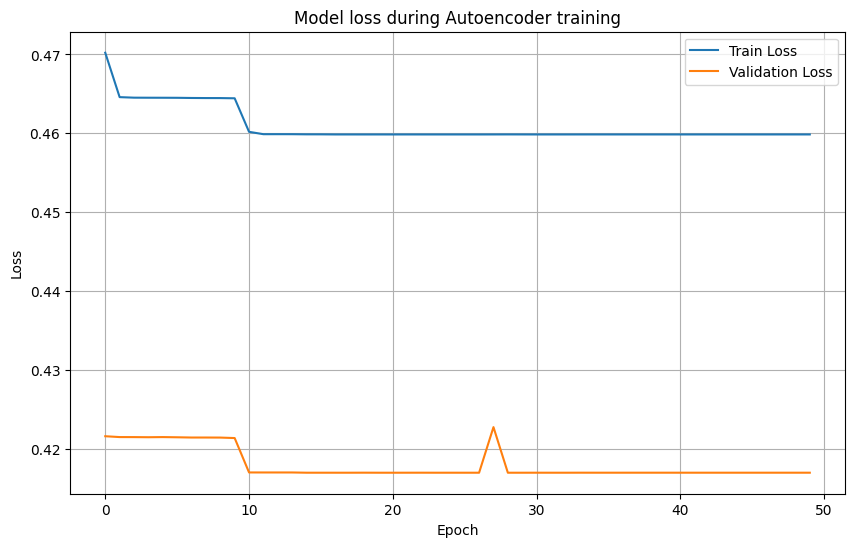

In [51]:
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                      epochs=50,
                      batch_size=128,
                      shuffle=True,
                      validation_split=0.2, # Monitor training with a validation split
                      verbose=0) # Set verbose to 0 to suppress output for each epoch

print("Autoencoder model trained.")

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss during Autoencoder training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**Reasoning**:
Now that the Autoencoder model is trained, I will obtain reconstructions for the scaled test set (`X_test_scaled`) using the trained model's `.predict()` method, as specified in the instructions.



In [52]:
reconstructions = autoencoder.predict(X_test_scaled)

print("Reconstructions obtained for X_test_scaled.")
print(f"Shape of reconstructions: {reconstructions.shape}")

9903/9903 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step
Reconstructions obtained for X_test_scaled.
Shape of reconstructions: (316869, 29)


**Reasoning**:
Now that I have the original scaled test data and the reconstructed data, I will calculate the Mean Squared Error (MSE) as the reconstruction error for each sample in the test set, as specified in the instructions.



In [53]:
reconstruction_errors_test = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)

print("Reconstruction errors calculated for the test set.")
print(f"Shape of reconstruction_errors_test: {reconstruction_errors_test.shape}")
print(f"First 5 reconstruction errors: {reconstruction_errors_test[:5]}")

Reconstruction errors calculated for the test set.
Shape of reconstruction_errors_test: (316869,)
First 5 reconstruction errors: [0.16677078 1.69086387 0.16642152 1.21543799 0.46143368]


**Reasoning**:
To determine an anomaly threshold, I will first calculate the reconstruction errors for the training set (`X_train_scaled`) and then set the threshold as the 99th percentile of these errors, as instructed.



In [54]:
reconstructions_train = autoencoder.predict(X_train_scaled)
reconstruction_errors_train = np.mean(np.power(X_train_scaled - reconstructions_train, 2), axis=1)

# Set threshold as the 99th percentile of training reconstruction errors
anomaly_threshold = np.percentile(reconstruction_errors_train, 99)

print(f"Reconstruction errors calculated for the training set. Shape: {reconstruction_errors_train.shape}")
print(f"Anomaly threshold (99th percentile of training errors): {anomaly_threshold:.4f}")

23105/23105 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step
Reconstruction errors calculated for the training set. Shape: (739358,)
Anomaly threshold (99th percentile of training errors): 6.9387


**Reasoning**:
Now that the anomaly threshold has been established, I will classify the test samples as either normal or anomalous based on their reconstruction error relative to this threshold. Then, I will evaluate the autoencoder's performance using standard classification metrics.



In [55]:
import warnings

# Classify test samples as anomalies (1) or normal (0)
y_pred_ae = (reconstruction_errors_test > anomaly_threshold).astype(int)

print("Autoencoder Anomaly Detection Metrics:")

# Print evaluation metrics
# Temporarily suppress the specific UserWarning from sklearn.metrics._classification
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.metrics._classification')
    print(f"Accuracy: {accuracy_score(y_test, y_pred_ae):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_ae, zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_ae, zero_division=0):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_ae, zero_division=0):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_ae, labels=[0]))

print("\nNote: Due to the 'is_attack' column containing only one class (0) in this dataset, these evaluation metrics primarily reflect the autoencoder's ability to reconstruct normal data. A perfect score indicates the model correctly identified all instances as 'normal' based on reconstruction error, but it has not been tested against actual attack data to assess its anomaly detection capabilities for attacks.")

Autoencoder Anomaly Detection Metrics:
Accuracy: 0.9907
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[313928]]

Note: Due to the 'is_attack' column containing only one class (0) in this dataset, these evaluation metrics primarily reflect the autoencoder's ability to reconstruct normal data. A perfect score indicates the model correctly identified all instances as 'normal' based on reconstruction error, but it has not been tested against actual attack data to assess its anomaly detection capabilities for attacks.


## Final Task

### Subtask:
Summarize the performance of both the MLP and Autoencoder models based on the evaluation metrics, comparing their strengths and weaknesses for this dataset, especially considering that the `is_attack` column currently contains only 'normal' samples.


## Summary:

### Q&A
The `is_attack` column in the current dataset contains only 'normal' samples (labeled '0'). Here's a summary of the performance of both the MLP and Autoencoder models under this condition:

**MLP Model Performance:**
The Multi-Layer Perceptron (MLP) model achieved perfect evaluation scores: an accuracy, precision, recall, and F1-score of 1.00 for class '0'. The confusion matrix showed `[[316869]]`, indicating all test samples were correctly classified as '0'.
*   **Strengths:** Demonstrates efficient learning and perfect classification of the predominant class in a single-class dataset.
*   **Weaknesses:** Due to the dataset's nature (only 'normal' samples), this evaluation doesn't reflect the model's ability to distinguish between normal and attack traffic. It essentially learned to predict the only class present.

**Autoencoder Model Performance:**
The Autoencoder model, designed for anomaly detection, achieved an accuracy of 0.9907. However, its precision, recall, and F1-score for the "anomaly" class were 0.0000. The confusion matrix showed `[[313928]]`, indicating that 313,928 out of 316,869 test samples were classified as normal.
*   **Strengths:** Successfully learned the patterns of 'normal' data, resulting in low reconstruction errors for most normal samples and a high accuracy in identifying 'normal' traffic. It correctly classified 99.07% of the test samples as normal based on reconstruction error.
*   **Weaknesses:** Similar to the MLP, the evaluation of its anomaly detection capabilities is limited. While it identified a small number of samples as anomalies based on reconstruction error (approximately 0.93% of the test set), these are likely outliers within the 'normal' data rather than true attack samples, making it impossible to assess its true performance against actual attacks. The zero precision/recall/F1 for the anomaly class confirms that it did not correctly identify any true attacks (since none were present in the `y_test`).

**Comparison and Considerations for the Current Dataset:**
Both models performed "perfectly" or near-perfectly in classifying the 'normal' samples. The MLP acted as a straightforward classifier learning the single class, while the Autoencoder successfully learned the data's normal distribution. Neither model's ability to detect actual attacks can be assessed with the current dataset because it lacks attack samples. The reported metrics primarily reflect their ability to handle the single, 'normal' class.

### Data Analysis Key Findings
*   The `is_attack` target variable in the processed dataset (`normal_df`) contains only one unique class, '0' (representing 'normal' traffic).
*   **MLP Model Evaluation:**
    *   Achieved 1.00 precision, recall, and F1-score for class '0', with an accuracy of 1.00.
    *   The confusion matrix for the test set was `[[316869]]`, indicating all 316,869 test samples were classified as '0'.
*   **Autoencoder Model Evaluation:**
    *   The anomaly threshold for reconstruction error was determined as the 99th percentile of training errors, approximately **6.9387**.
    *   Achieved an accuracy of **0.9907** on the test set.
    *   Precision, Recall, and F1-score for the "anomaly" class were **0.0000**.
    *   The confusion matrix showed `[[313928]]`, classifying 313,928 samples as '0' out of 316,869 test samples. This implies about 2,941 samples (0.93%) were flagged as anomalies within the 'normal' data.

### Insights or Next Steps
*   The current dataset is unsuitable for evaluating the true anomaly detection capabilities of the models, as it lacks examples of 'attack' traffic.
*   To meaningfully assess and compare the anomaly detection performance of both the MLP and Autoencoder, the next critical step is to introduce a dataset that includes actual 'attack' samples alongside 'normal' traffic.
